In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#Question 1 
#Load data
customer_data = pd.read_csv('Consumer_Complaints.csv')


#Question 2
#Discard the rows where consumer complaint narrative is blank. How many rows does this yield?
#Ans: 366593 
#Comments based on the date the data was taken 

customer_data.dropna(subset=['Consumer complaint narrative'], how='all', inplace = True)
len(customer_data)



/Users/shomonamukherjee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


366593

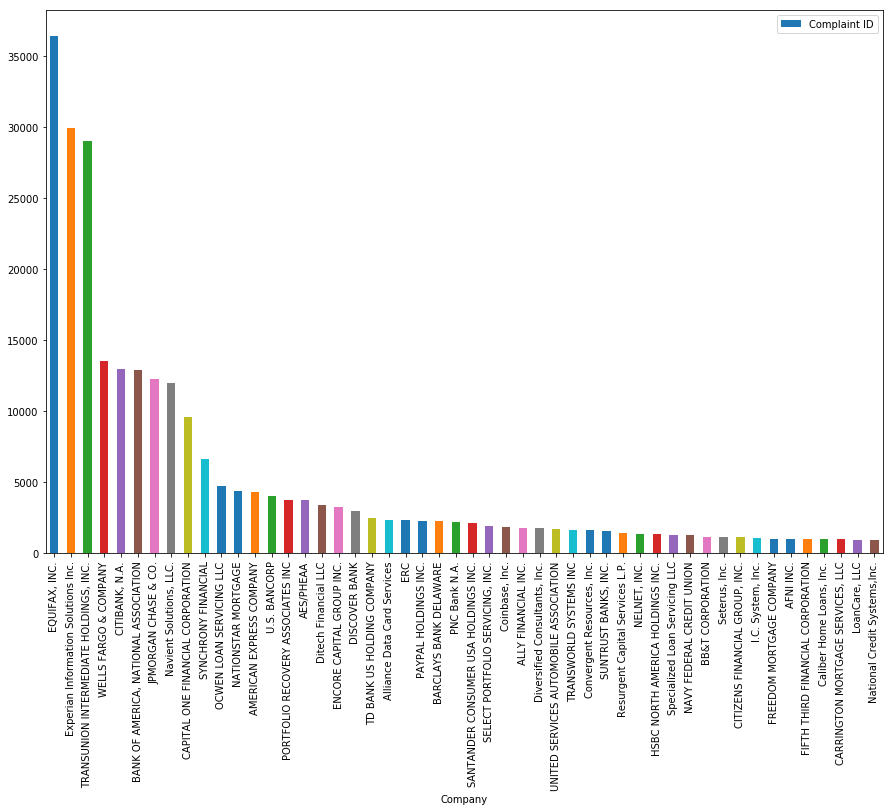

In [2]:
#Question 3 
#3. Draw a histogram of number of complaints by company name. What can you conclude about which
#institutions are causing the most complaints?
#Ans: The institutions which are causing the post complaints are:
#EQUIFAX, INC.                             36433
#Experian Information Solutions Inc.       29926
#TRANSUNION INTERMEDIATE HOLDINGS, INC.    29005
#WELLS FARGO & COMPANY                     13556
#CITIBANK, N.A.                            12998 
#The most common complaints in these banks is about credit reporting and debt collection.
#Comments based on the day data was taken 



df = customer_data.copy()
grouped = df.groupby(['Company']).count().reset_index()
first10 = grouped.sort_values(['Complaint ID'],ascending = [False]).head(50)
first10.plot(x='Company',y='Complaint ID',kind='bar', figsize = (15,10))
plt.show()



In [9]:
#Question 4
#Ans: 74.2% for LinearSVC
#64.7% for SGDClassifier
#For this classification problem, as LinearSVC has scored better as a model I would choose it over SGDClassifier
#In LinearSVC credit reporting, consumer loan and money transfers are few of the products best predicted as per confusion matrix. 


from sklearn.feature_extraction.text import CountVectorizer

feat = np.array(customer_data['Consumer complaint narrative'])
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(feat)


from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, np.array(customer_data['Product']) ,test_size=0.20)

from sklearn.svm import LinearSVC
model_SVM = LinearSVC()

model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)

print("LinearSVC Score:")
np.mean(y_pred == y_test)


LinearSVC Score:


0.7379260491823402

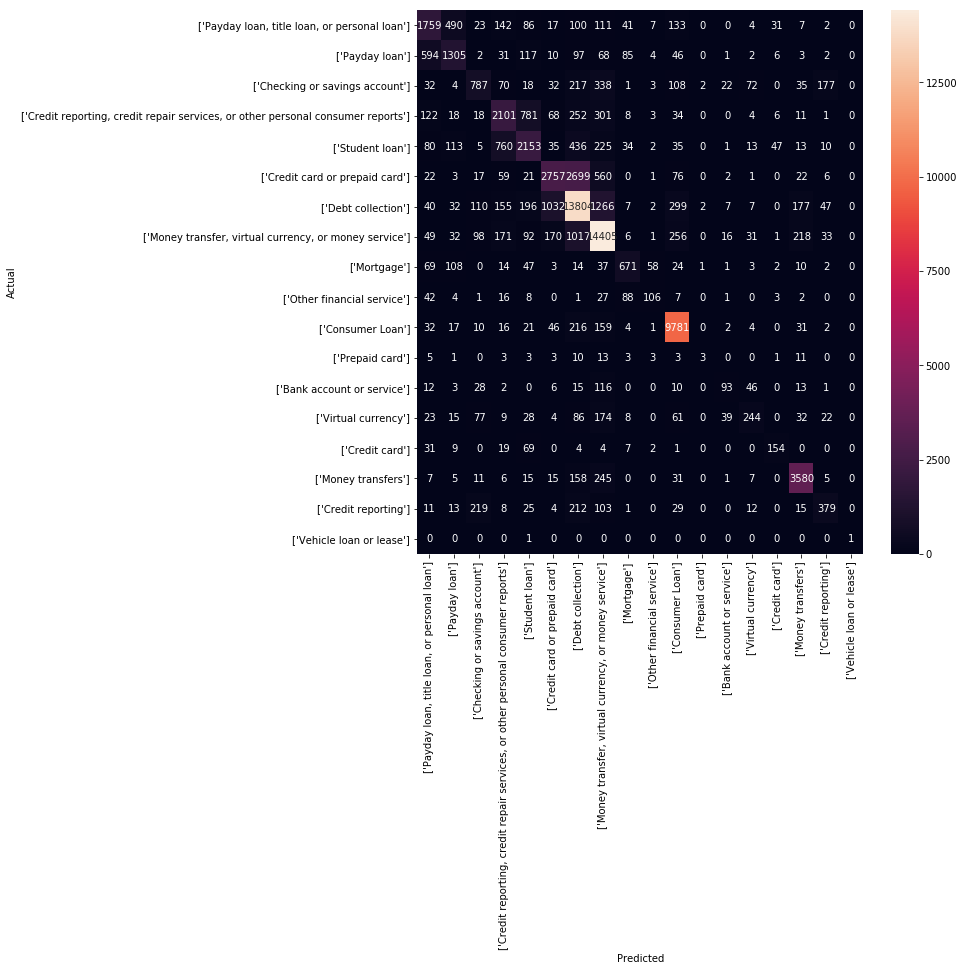

In [4]:
#Display the confusion matrix for the LinearSVC Model

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
prods = pd.DataFrame(list(set(list(df['Product']))))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=prods.values, yticklabels=prods.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [5]:
#SGDClassifier for prediction

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)
text_clf_svm = clf.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)

print("SGDClassifier Score:")
np.mean(predicted_svm == y_test)

/Users/shomonamukherjee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier Score:


0.6504589533408802

In [6]:
#Question 5a:
#LinearSVC for sub-product gave an efficiency of 59.4%
cst = customer_data.copy()

cst.dropna(subset=['Sub-product'], how='all', inplace = True)

from sklearn.feature_extraction.text import CountVectorizer

feat = np.array(cst['Consumer complaint narrative'])
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(feat)


from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, np.array(cst['Sub-product']) ,test_size=0.20)

from sklearn.svm import LinearSVC
model_SVM = LinearSVC()

model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)

print("LinearSVM Score for Sub-product:")
np.mean(y_pred == y_test)

LinearSVM Score for Sub-product:


0.5844093887157306

In [7]:
#Question 5b:
#LinearSVC for Issue gave an efficiency of 46.05%
cst = customer_data.copy()

cst.dropna(subset=['Issue'], how='all', inplace = True)

from sklearn.feature_extraction.text import CountVectorizer

feat = np.array(cst['Consumer complaint narrative'])
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(feat)


from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, np.array(cst['Issue']) ,test_size=0.20)

from sklearn.svm import LinearSVC
model_SVM = LinearSVC()

model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)

print("LinearSVM Score for Issue:")
np.mean(y_pred == y_test)

LinearSVM Score for Issue:


0.44886045908973116

In [8]:
#Question 5c:
#LinearSVC for Sub-issue gave an efficiency of 41.3%
cst = customer_data.copy()

cst.dropna(subset=['Sub-issue'], how='all', inplace = True)

from sklearn.feature_extraction.text import CountVectorizer

feat = np.array(cst['Consumer complaint narrative'])
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(feat)


from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, np.array(cst['Sub-issue']) ,test_size=0.20)

from sklearn.svm import LinearSVC
model_SVM = LinearSVC()

model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)

print("LinearSVM Score for Sub-issue:")
np.mean(y_pred == y_test)


LinearSVM Score for Sub-issue:


0.4107730263157895